## <center>Amazon fine food review - Sentiment analysis</center>

This code along is to study Amazon food review from customers, and try to predict whether a review is positive or negative. The dataset contains more than 500K reviews with number of upvotes & total votes to those comments.

## Understanding the data
Our main objective is to predict whether a review is Positive or Negative based on the Text.

If we see the Score column, it has values 1,2,3,4,5 . Considering 1, 2 as Negative reviews and 4, 5 as Positive reviews. For Score = 3 we will consider it as Neutral review and lets delete the rows that are neutral, so that we can predict either Positive or Negative

HelfulnessNumerator says about number of people found that review usefull and HelpfulnessDenominator is about usefull review count + not so usefull count. So, from this we can see that HelfulnessNumerator is always less than or equal to HelpfulnesDenominator.


### About the Dataset:

Dataset Summary:
- Number of reviews: 568,454
- Number of users: 256,059
- Number of products: 74,258
- Timespan: Oct 1999 - Oct 2012
- Number of Attributes/Columns in data: 10

Following is the attributes information:

|Feature|Description|
|-----|-----|
|Id| index of the dataset|
|ProductId| unique identifier for the product|
|UserId| unqiue identifier for the user|
|ProfileName| name of the user| 
|HelpfulnessNumerator| number of users who found the review helpful|
|HelpfulnessDenominator| number of users who indicated whether they found the review helpful or not|
|Score| rating between 1 and 5|
|Time| timestamp for the review|
|Summary| brief summary of the review|
|Text| text of the review|


Objective:
Given a review, determine whether the review is positive (Rating of 4 or 5) or negative (rating of 1 or 2).

## Loading the Libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [3]:
df = pd.read_csv("./Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
# Shape of our data
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

### Task 1:  Remove Neutral reviews then convert `score` <=3 as `0` and >=3 as `1`. Drop the duplicates from the dataframe. Store only those reviews which the number of people found useful. Sort values based on time and take a subset of `100000` rows.
***


### Instructions
- Remove Neutral reviews then convert score <=3 as 0 and >=3 as 1
- Drop the duplicates from the dataframe and store only those reviews which the number of people found useful.
- Sort values based on time  and subset only 100000 rows and store it in a variable.

In [5]:
#Removing Neutral reviews
data = df[df['Score']!=3]

# Convert Score <=3 as 0 and >=3 as 1
data["Score"] = data["Score"].apply(lambda x: 0 if x <= 3 else 1) 

# Drop duplicates from dataframe by passing subset as 'UserId','ProfileName','Time','Text'
final_data= data.drop_duplicates(subset=('UserId','ProfileName','Time','Text'))
print(final_data.shape)

# Dropping rows where HelpfulnessNumerator < HelpfulnessDenominator
final = final_data[final_data['HelpfulnessNumerator']<=final_data['HelpfulnessDenominator']]

# finally sort the values by Time and subset only first 100000 rows 
final = final.sort_values(['Time'], axis=0)   #TIme based sorting
final = final.head(100000)
final.head()

(364173, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150523,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
150500,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...
451855,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...
230284,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta..."
451854,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...


### Task 2: Remove stopwords/punctuation and tokenize reviews(`final['Text']`). Then apply stemming on review text. 
***
Converting all words to lowercase and removing punctuations and html tags if any

Stemming- Converting the words into their base word or stem word ( Ex - tastefully, tasty, these words are converted to stem word called 'tasti'). This reduces the vector dimension because we dont consider all similar words

Stopwords - Stopwords are the unnecessary words that even if they are removed the sentiment of the sentence dosent change.

Ex - This pasta is so tasty ==> pasta tasty ( This , is, so are stopwords so they are removed)

### Instructions
- In this task you will tokenize reviews(`final['Text']`), then remove stopwords.
- Using SnowballStemmer apply stemming on review text.

In [6]:
%%time
import re
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from string import punctuation
import nltk


stop_words = list(set(stopwords.words('english')))+list(punctuation)+['``', "'s", "...", "n't", r'<.*?>','br']

# tokenize
final['Text'] = [nltk.word_tokenize(x) for x in final['Text']]

# # stopword removal
final['Text'] = final['Text'].apply(lambda row: [word for word in row if word not in stop_words])

# stemming words
stemmer = PorterStemmer()
snow_stemmer = SnowballStemmer('english')
final['Text'] = final['Text'].apply(lambda x: [snow_stemmer.stem(i) for i in x])
final['Text'] = final['Text'].apply(lambda x: ' '.join(x))
final.head()

Wall time: 3min 34s


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150523,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,witti littl book make son laugh loud recit car...
150500,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,i rememb see show air televis year ago i child...
451855,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,beetlejuic well written movi .. everyth excel ...
230284,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,a twist rumplestiskin captur film star michael...
451854,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,1,946857600,FANTASTIC!,beetlejuic excel funni movi keaton hilari wack...


### Task 3: Plot the WordCloud for Frequent words in Positive Sentiments
***
### Instructions
- Plot the WordCloud for Frequent words in Positive Sentiments 

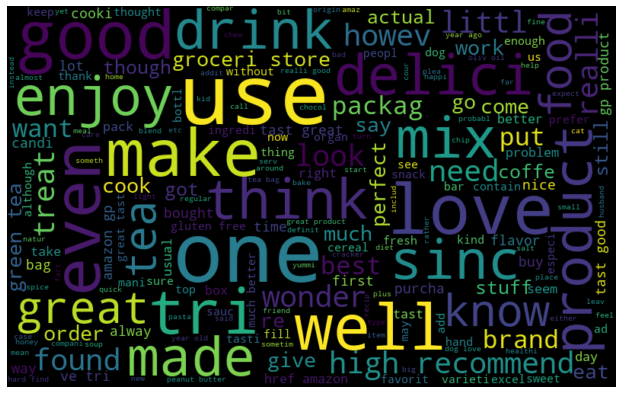

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
# Positive Sentiment
pos_words = ' '.join([text for text in final['Text'][final['Score'] == 1]])

# generate wordcloud object for positive sentiments
pos_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos_words)

plt.figure(figsize=(15, 7))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Task 4: Store `final['Text']` in X and `final['Score']` in y. Implement the count vectorisation on all rows and implement a logistic regression model on vectorised dataframe.
***
### Instructions
- Store `final['Text']` in X and `final['Score']` in y
- In this task implement the vectorisation(i.e. CountVectorizer) on all rows and implement a logistic regression model on the vectorised dataframe.
- Predict the accuracy on test data.

In [8]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = final['Text']
y = final['Score']

count_vec = CountVectorizer(stop_words = 'english')

X_c = count_vec.fit_transform(X)
print('No of features: {}'.format(X_c.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_c, y, test_size=0.3, random_state=0)
print('No of train records: {}'.format(X_train.shape[0]))
print('No of test records: {}'.format(X_test.shape[0]))

clf_model = LogisticRegression()
clf = clf_model.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc))

No of features: 46525
No of train records: 70000
No of test records: 30000
Model Accuracy: 0.9257666666666666
Wall time: 8.01 s


### Task 5: Calculate Top 20 positive and Negative words based on coefficients for Count Vectorisation.
***
In this task we will calculate Top 20 positive and Negative words based on coefficients.  
### Instructions
- Get feature names using `get_feature_names()` attribute of count vectorizer
- Get coefficients using `coef_` attribute of logistic regression
- Create a dataframe with Word and Coefficient as column
- Sort the values in ascending order and print top 20 positive and negative words

In [9]:
w = count_vec.get_feature_names()
coef = clf.coef_.tolist()[0]
coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
print('')
print('-Top 20 positive-')
print(coeff_df.head(20).to_string(index=False))
print('')
print('-Top 20 negative-')        
print(coeff_df.tail(20).to_string(index=False))


-Top 20 positive-
          Word  Coefficient
       skeptic     2.726877
        awesom     2.219606
          solv     1.983841
         uniqu     1.947119
       perfect     1.836420
          amaz     1.813569
         excel     1.783590
         colli     1.783403
          hook     1.769980
        delici     1.741803
     delicious     1.739240
        addict     1.718146
           ctc     1.664449
         ramun     1.623950
          join     1.610529
           dew     1.606995
 emeraldforest     1.593457
        bergin     1.559188
          best     1.548116
       warhead     1.530765

-Top 20 negative-
       Word  Coefficient
     return    -1.802689
   hometown    -1.803899
     bummer    -1.805014
     cancel    -1.805220
      broke    -1.812673
        ugh    -1.816432
    frichik    -1.844000
       yike    -1.857820
   unaccept    -1.919016
 disappoint    -1.931093
      beani    -1.931441
    horribl    -1.948563
    average    -1.960051
   powergel    -1.974623

### Task 6: As we see in above task that some of those significant coefficients are not meaningful. Try to implement the other vectorisation(i.e. TfidfVectorizer) on all rows and implement a logistic regression model on the vectorised dataframe.
***
### Instructions
- In above task we implemented CountVectorizer and the accuracy is around 92.5%. However we notice that some of those significant coefficients are not meaningful. Lets try to implement the other vectorisation(i.e. TfidfVectorizer) on all rows and implement a logistic regression model on the vectorised dataframe.
- Predict the accuracy on test data.

In [10]:
%%time

X = final['Text']
y = final['Score']

tfidf = TfidfVectorizer(stop_words = 'english')
X_t = tfidf.fit_transform(X)
print('No of features: {}'.format(X_t.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.3, random_state=0)
print("No of train records: {}".format(X_train.shape[0])) 
print('No of test records: {}'.format(X_test.shape[0]))

clf_model = LogisticRegression()
clf = clf_model.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc))

No of features: 46525
No of train records: 70000
No of test records: 30000
Model Accuracy: 0.9242
Wall time: 8.15 s


### Task 7: Calculate Top 20 positive and Negative words based on coefficients for Tfidf Vectorisation.
***
In this task we will calculate Top 20 positive and Negative words based on coefficients.  
### Instructions
- Get feature names using `get_feature_names()` attribute of tfidf vectorizer
- Get coefficients using `coef_` attribute of logistic regression
- Create a dataframe with Word and Coefficient as column
- Sort the values in ascending order and print top 20 positive and negative words

In [11]:
w = tfidf.get_feature_names()
coef = clf.coef_.tolist()[0]
coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
print('')
print('-Top 20 positive-')
print(coeff_df.head(20).to_string(index=False))
print('')
print('-Top 20 negative-')        
print(coeff_df.tail(20).to_string(index=False))


-Top 20 positive-
    Word  Coefficient
   great    11.099145
    best     9.031345
    love     7.872578
  delici     7.662813
 perfect     7.025315
   excel     6.577793
 favorit     5.657849
    good     5.419912
    nice     5.159005
    amaz     4.972338
  wonder     4.851610
  awesom     4.552629
  addict     4.272532
  smooth     4.003822
   yummi     3.958512
   tasti     3.950859
   alway     3.908317
   thank     3.789485
    easi     3.765279
   happi     3.672656

-Top 20 negative-
       Word  Coefficient
    disgust    -3.820552
        bad    -4.061521
         ok    -4.086765
  tasteless    -4.117631
    thought    -4.148267
       wast    -4.195287
       weak    -4.205957
       mayb    -4.236533
       wors    -4.283625
      money    -4.443516
      stale    -4.795579
      bland    -4.913505
   unfortun    -5.004749
      threw    -5.132121
         aw    -5.142458
    horribl    -5.406375
     return    -5.791056
    terribl    -5.904093
      worst    -7.658185


#### Accurancy is roughly the same - 92.4%. However we notice that the significant words make much more sense now, with higher coefficient magnitude as well!